# Machine Learning 2022-2023 - UMONS 
# Exploratory Data Analysis of the Pokemon dataset


The goal of the lab is to get more familiar with the Pandas library in Python, which will allow you to manipulate dataframes, compute the statistics of its variables, and visualize them. Data exploration is an important step before using any of the Machine Learning model that you'll discover through the course. It will grant you a deeper understanding of the content of the dataset, which will ease any a posteriori manipulation.   

In this lab, we'll work with the 'Pokemon' dataset, which contains the attributes of several Pokemon across various generations:
- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

**1. Import all necessary libraries**

In [1]:
import matplotlib.pyplot as plt  # importing all the important packages
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

**2.Read the csv file 'Pokemon.csv' and load it into a Dataframe. Print the 10 first rows.** 

In [2]:
df = pd.read_csv('data/Pokemon.csv')
df.head(n=10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


**3. Print the general information of the Pokemon dataset.** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**4. Get the shape of the dataframe.** 

In [4]:
df.shape

(800, 13)

**5. Drop the "#' column and set the dataframe index to the 'Name' column.**

In [5]:
df.drop(['#'], axis=1, inplace=True)  # drop the '#' column.
df.set_index('Name', inplace=True)  # Set 'Name' as index.
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**6. Check if there are any missing values in the dataframe, and count them per column. For non numerical variables, replace the missing values by 'Unknown'. For the remaining variables, drop the complete row containing the missing value. Check that the dataframe does not contain missing values anymore.**

In [6]:
# Count missing values
df.isna().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# Replace missing values for the categorical variable 'Type 2' with 'Unknown'.
df['Type 2'].fillna('Unknown', inplace=True)

# Drop the complete row that contains at least one missing value for the remaining variables.
df.dropna(axis=0, inplace=True)

# Check that the dataframe does not contain any more missing values.
assert ~df.isna().values.any()
df.isna().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

**7. Change the data types of the variables 'Type 1' and 'Type 2' and 'Generation' to categorical data**

In [8]:
df = df.astype({'Type 1': 'category', 'Type 2': 'category', 'Generation': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Type 1      800 non-null    category
 1   Type 2      800 non-null    category
 2   Total       800 non-null    int64   
 3   HP          800 non-null    int64   
 4   Attack      800 non-null    int64   
 5   Defense     800 non-null    int64   
 6   Sp. Atk     800 non-null    int64   
 7   Sp. Def     800 non-null    int64   
 8   Speed       800 non-null    int64   
 9   Generation  800 non-null    category
 10  Legendary   800 non-null    bool    
dtypes: bool(1), category(3), int64(7)
memory usage: 54.7+ KB


**8. Get general statistics (mean, standard deviation, ...) for the numerical variables of the dataset.** 

In [9]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


**9. For the categorical variables, count the number of values per category, as well as the count of co-occurences, i.e. the times categorical variables occur simultaneously.**

In [10]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [11]:
df['Type 2'].value_counts()

Unknown     386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ice          14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [12]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [13]:
df[{'Type 1', 'Type 2', 'Generation'}].value_counts()

Type 2   Type 1  Generation
Unknown  Water   1             19
         Normal  3             14
                 1             13
                 4             12
         Water   3             12
                               ..
Steel    Bug     4              1
Rock     Water   3              1
                 2              1
Flying   Steel   2              1
Bug      Poison  4              1
Length: 293, dtype: int64

**10. Get all the attributes of 'Bulbasaur'**

In [14]:
df.loc['Bulbasaur']

Type 1         Grass
Type 2        Poison
Total            318
HP                45
Attack            49
Defense           49
Sp. Atk           65
Sp. Def           65
Speed             45
Generation         1
Legendary      False
Name: Bulbasaur, dtype: object

**11. Sort the dataframe by increasing values of 'Attack' and decreasing values of 'Defense' (i.e. if two Pokemons have the same value for 'Attack', the one with higher 'Defense' should appear first).** 

In [15]:
df = df.sort_values(by=['Attack', 'Defense'], ascending=[True, False])
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Chansey,Normal,Unknown,450,250,5,5,35,105,50,1,False
Happiny,Normal,Unknown,220,100,5,5,15,65,30,4,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Magikarp,Water,Unknown,200,20,10,55,15,20,80,1,False
Blissey,Normal,Unknown,540,255,10,10,75,135,55,2,False


**12. Create a dataframe containing all Pokemons of type 1 'Psychic' having more than 100 in 'Attack', less than 40 in 'Defense' and more than 45 in Speed.**

In [16]:
sub_df = df[
    (df['Type 1'] == 'Psychic') 
    & (df['Attack'] > 100) 
    & (df['Defense'] < 40) 
    & (df['Speed'] > 45)
]
sub_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysAttack Forme,Psychic,Unknown,600,50,180,20,180,20,150,3,True


**13. Create two new columns, 'AttackAll' and 'DefenseAll' which take the sum of Attack and Sp. Attack, and the sum of 'Defense' and 'Sp. Defense',respectively.** 

In [17]:
df['AttackAll'] = df['Attack'] + df['Sp. Atk']
df['DefenseAll'] = df['Defense'] + df['Sp. Def']
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,AttackAll,DefenseAll
Name,,,,,,,,,,,,,
Chansey,Normal,Unknown,450,250,5,5,35,105,50,1,False,40,110
Happiny,Normal,Unknown,220,100,5,5,15,65,30,4,False,20,70
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,20,460
Magikarp,Water,Unknown,200,20,10,55,15,20,80,1,False,25,75
Blissey,Normal,Unknown,540,255,10,10,75,135,55,2,False,85,145


**14. Write a generic function taking the ratio of two values 'a' and 'b'. Use this function to create a new column 'AtkOverDef' giving the ratio of 'AttackAll' over 'DefenseAll' for each Pokemon.** 

In [18]:
def ratio(a, b):
    return a / b


df['AttkOverDef'] = ratio(df['AttackAll'], df['DefenseAll'])
# Divisions by 0 are automatically mapped ton 'inf'.
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,AttackAll,DefenseAll,AttkOverDef
Name,,,,,,,,,,,,,,
Chansey,Normal,Unknown,450,250,5,5,35,105,50,1,False,40,110,0.363636
Happiny,Normal,Unknown,220,100,5,5,15,65,30,4,False,20,70,0.285714
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,20,460,0.043478
Magikarp,Water,Unknown,200,20,10,55,15,20,80,1,False,25,75,0.333333
Blissey,Normal,Unknown,540,255,10,10,75,135,55,2,False,85,145,0.586207


**15. Change the column names to upper cases, and remove the '.' in the column names, as well as blanks.** 

In [19]:
# change into upper case
df.columns = df.columns.str.upper().str.replace('.', '', regex=False).str.replace(' ', '')  
df.head()

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SPATK,SPDEF,SPEED,GENERATION,LEGENDARY,ATTACKALL,DEFENSEALL,ATTKOVERDEF
Name,,,,,,,,,,,,,,
Chansey,Normal,Unknown,450,250,5,5,35,105,50,1,False,40,110,0.363636
Happiny,Normal,Unknown,220,100,5,5,15,65,30,4,False,20,70,0.285714
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,20,460,0.043478
Magikarp,Water,Unknown,200,20,10,55,15,20,80,1,False,25,75,0.333333
Blissey,Normal,Unknown,540,255,10,10,75,135,55,2,False,85,145,0.586207


**16. Plot an histogram of the different 'TYPE1' categories. The figure must be 16 inch wide and 4 inch high. 
Use the matplotlib.pyplot library and the countplot method from the seaborn librabry. The counts should appear in increasing order.**

<AxesSubplot:xlabel='TYPE1', ylabel='count'>

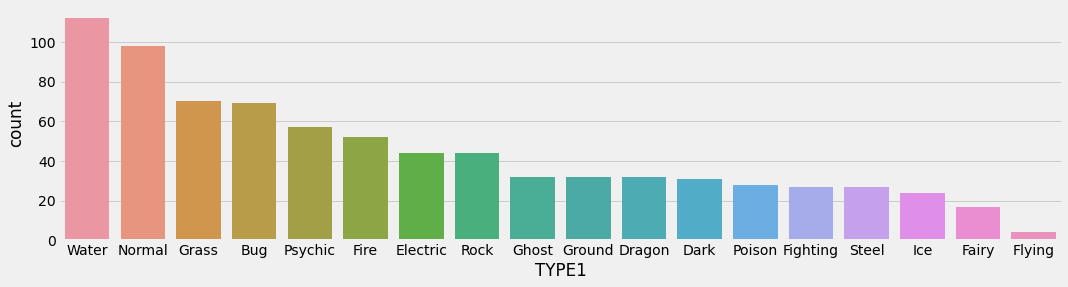

In [20]:
plt.figure(figsize=(16, 4))  # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='TYPE1', data=df, order=df.TYPE1.value_counts().index)

**17. Do the same as above, but for the 'TYPE2' categories.** 

<AxesSubplot:xlabel='TYPE2', ylabel='count'>

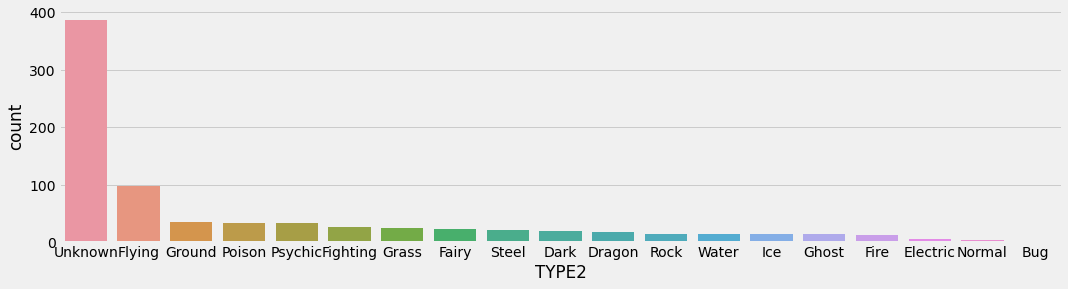

In [21]:
plt.figure(figsize=(16, 4))  # this creates a figure 8 inch wide, 4 inch high
sns.countplot(x='TYPE2', data=df, order=df.TYPE2.value_counts().index)

**18. Plot the densities of the variables 'Attack', 'Defenses' and 'Speed' onto three separates plots. Use the displot method of the library seaborn.**

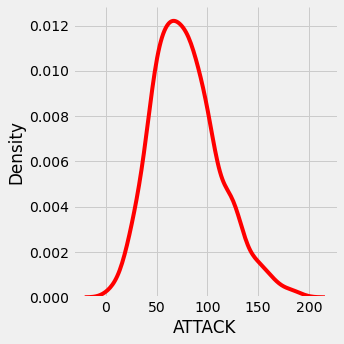

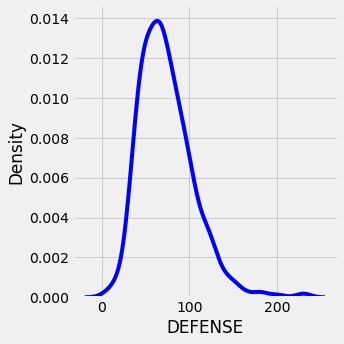

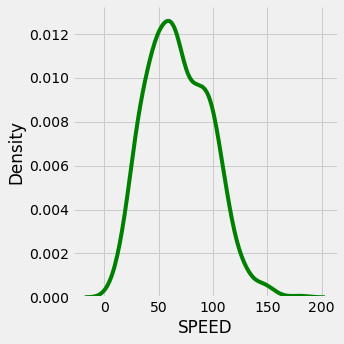

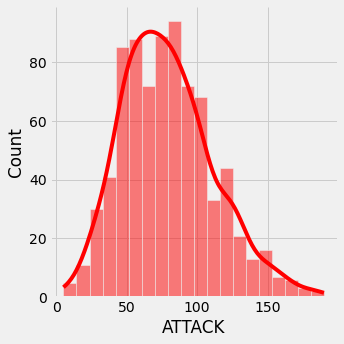

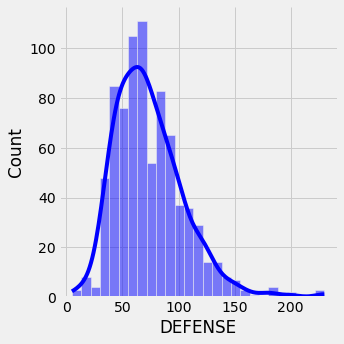

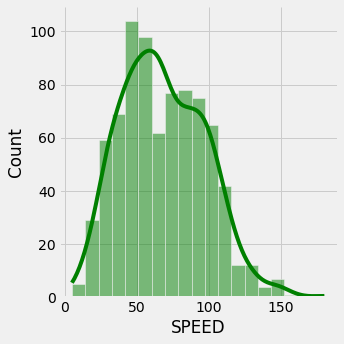

In [22]:
sns.displot(x='ATTACK', color='red', kind='kde', data=df)
sns.displot(x='DEFENSE', color='blue', kind='kde', data=df)
sns.displot(x='SPEED', color='green', kind='kde', data=df)
# OR
sns.displot(x='ATTACK', color='red', kde=True, data=df)
sns.displot(x='DEFENSE', color='blue', kde=True, data=df)
sns.displot(x='SPEED', color='green', kde=True, data=df)

**19. Plot the density of the variable 'ATTACK' for Legendary and non Legendary pokemons. The two densities should appear on different facets of the same plot.**

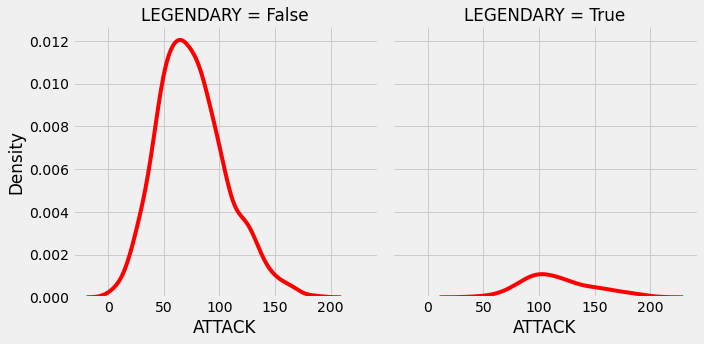

In [23]:
sns.displot(data=df, x='ATTACK', color='red', kind='kde', col='LEGENDARY')

**20. Generate a scatter plot of the variable 'Defense' on the y-axis, and the variable 'Attack' on the x-axis. Legendary and non-legendary Pokemons should be indicated using different colors.**

<AxesSubplot:xlabel='ATTACK', ylabel='DEFENSE'>

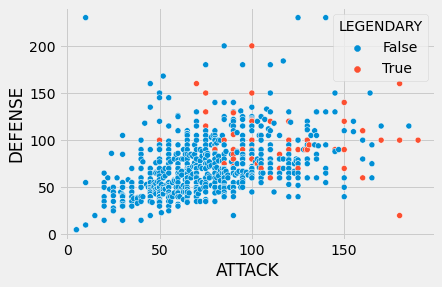

In [24]:
sns.scatterplot(data=df, x='ATTACK', y='DEFENSE', hue='LEGENDARY')

**21. Filter the dataframe to contain only Pokemons of generations 1 and 4. Using the filtered dataframe, generate a scatter plot of the variable 'Total' on the y-axis, and the variable 'Attack' on the x-axis, by separating the two filtered generations. Check how to remove unused categories from a dataframe prior to plotting.**

**The figure shoud be 8 inches high, and 8 inches wide.**

<AxesSubplot:xlabel='ATTACK', ylabel='TOTAL'>

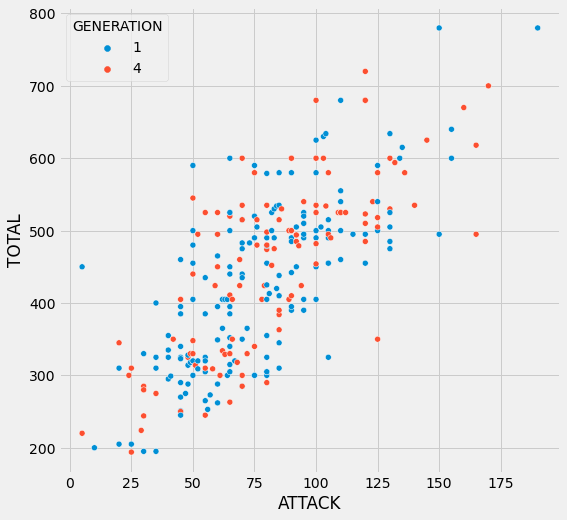

In [25]:
df_filtered = df[(df.GENERATION == 1) | (df.GENERATION == 4)].copy()
df_filtered.GENERATION = df_filtered.GENERATION.cat.remove_unused_categories()

plt.figure(figsize=(8, 8))
sns.scatterplot(x='ATTACK', y='TOTAL', data=df_filtered, hue='GENERATION')

**22. Create a histogram of the variable 'GENERATION'. Separate legendary and non-legendary Pokemons. The counts should appear on the same figure in decreasing order.** 

**The figure should be 4 inches high, and 16 inches wide.**

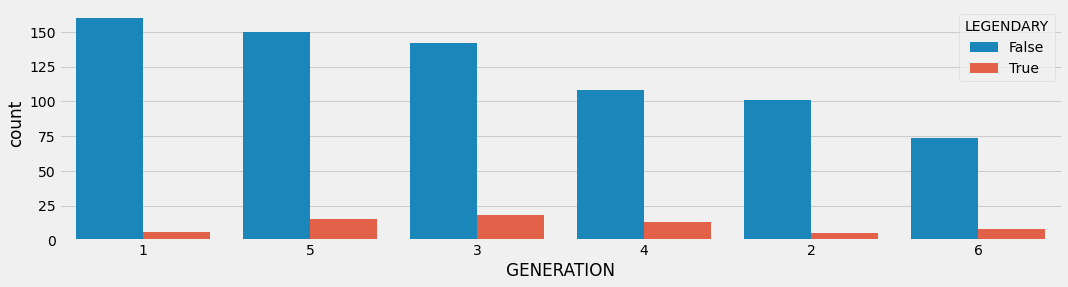

In [26]:
plt.figure(figsize=(16, 4))  # this creates a figure 16 inch wide, 4 inch high
sns.countplot(x='GENERATION', data=df, order=df.GENERATION.value_counts().index, hue='LEGENDARY')
plt.show()

**23. Generate a boxplot of the variable 'TOTAL'. Use the method boxplot from the library seaborn. How to interpret it?** 

<AxesSubplot:ylabel='TOTAL'>

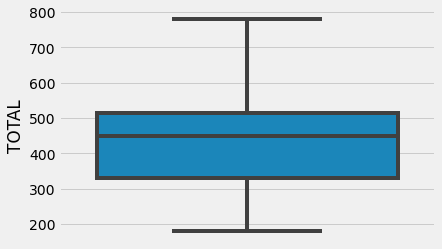

In [27]:
sns.boxplot(y='TOTAL', data=df)

The horizontal line within the box corresponds to the median of the variable 'TOTAL' (around 450). The extremities of the box correspond to the 25% quartile $Q_1=330$, and to the 75% quartile $Q_3=515$, i.e. 25% of all observations of the variable 'TOTAL' are below 330, while 75% of all observations are below 515. 

The 'T' lines correspond to the whiskers. The extremity of the upper whisker corresponds to the highest observation that is lower than $Q_3 + 1.5\text{IQR}= 792.5$, while the extremity of the lower whisker corresponds to the lowest observation that is higher than $Q_1 - 1.5\text{IQR}=52.5$, where $\text{IQR} = Q_3 - Q_1=185$ is the inter-quartile range. Here the highest observation for the variable 'TOTAL' is 780, while the lowest observation is 180.  Any value above $Q_3 + 1.5\text{IQR}$ or below $Q_1 - 1.5\text{IQR}$ is called an *outlier*, and appears as a circle on the boxplot. In our case, we don't have outliers for the variable 'Total'.

In [28]:
df.TOTAL.describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: TOTAL, dtype: float64

**24. Generate one boxplot of the variable 'TOTAL' per category of the variable 'GENERATION'. Separate legendary and non-legendary Pokemons. All boxplots must appear on the same plot.**

<AxesSubplot:xlabel='LEGENDARY', ylabel='TOTAL'>

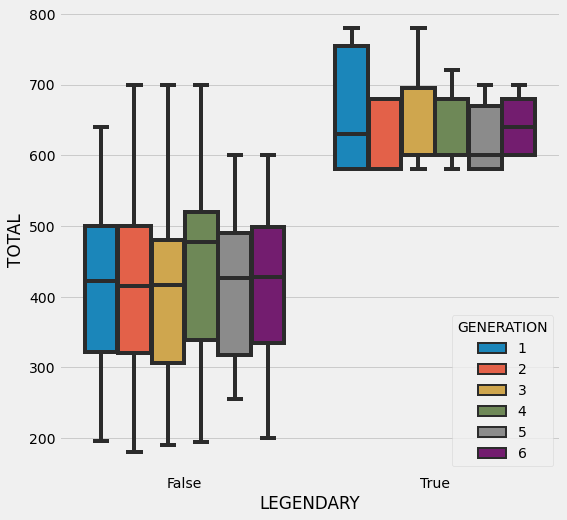

In [29]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='LEGENDARY', y='TOTAL', data=df, hue='GENERATION')